In [2]:
import pandas as pd

data = {
    "Studienzeit": [5,2,8,1,4,6,3,2,7,5],
    "Fehlstunden": [2,10,1,15,4,0,6,12,1,3],
    "Elternbildung": [4,2,5,1,3,4,2,2,5,3],
    "Hausaufgaben": [90,40,95,20,75,100,60,30,85,80],
    "Klausurpunkte": [88,55,92,40,70,96,65,50,89,78],
    "Endnote": [2,4,1,5,3,1,3,4,2,2]
}

df = pd.DataFrame(data)
file_path = "schueler_noten.csv"
df.to_csv(file_path, sep=";", index=False)

print(f"{file_path} is successfully created!")

schueler_noten.csv is successfully created!


In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

erste Zeile:    Studienzeit  Fehlstunden  Elternbildung  Hausaufgaben  Klausurpunkte  \
0            5            2              4            90             88   
1            2           10              2            40             55   
2            8            1              5            95             92   
3            1           15              1            20             40   
4            4            4              3            75             70   

   Endnote  
0        2  
1        4  
2        1  
3        5  
4        3  


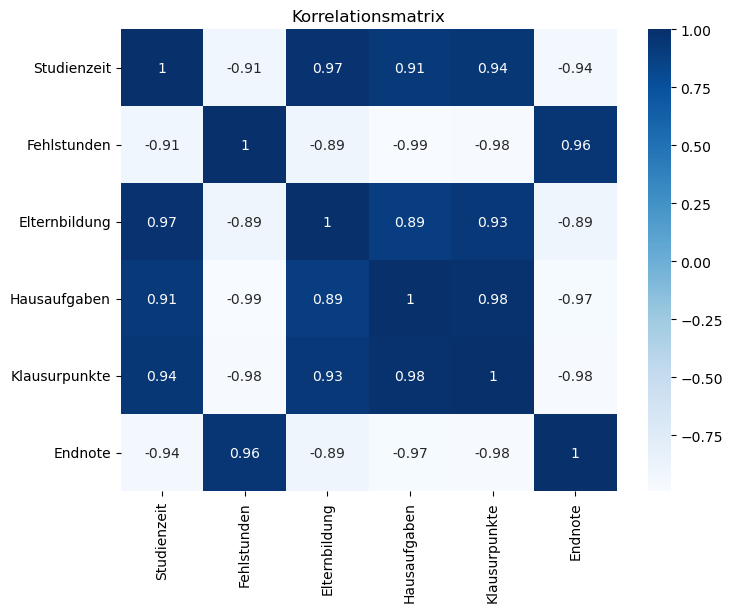

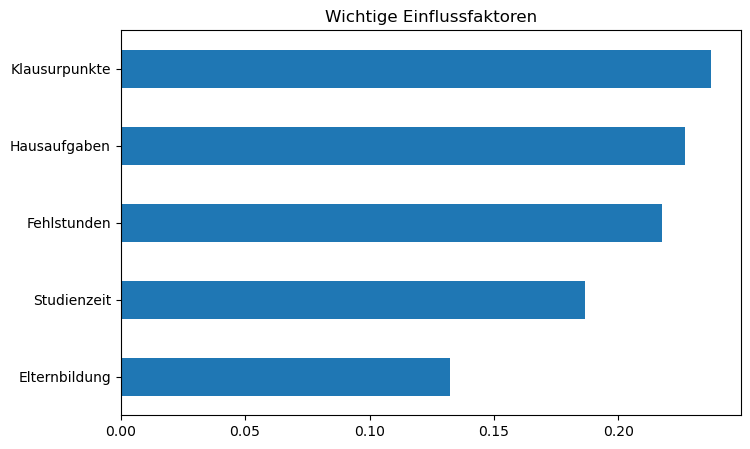

In [8]:
df = pd.read_csv('schueler_noten.csv', sep = ';')
print(f"erste Zeile: {df.head()}")
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.title("Korrelationsmatrix")
plt.show()

X = df.drop("Endnote", axis = 1)
y = df["Endnote"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind = "barh", figsize=(8,5))
plt.title("Wichtige Einflussfaktoren")
plt.show()

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Genauigkeit: ", accuracy_score(y_test, y_pred))


Genauigkeit:  1.0


In [22]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as n
import matplotlib.pyplot as plt

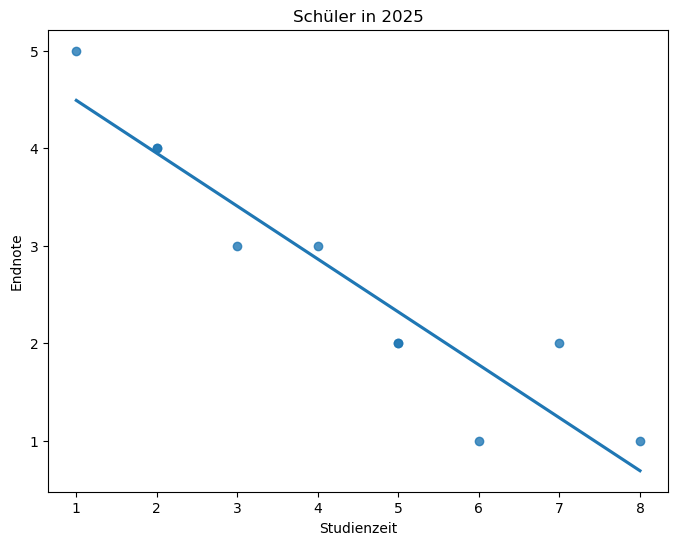

In [33]:
df = pd.read_csv('schueler_noten.csv', sep=';')
plt.figure(figsize=(8,6))
X = df['Studienzeit'].values.reshape(-1, 1)  # 2D array for sklearn
y = df['Endnote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
sns.regplot(x = df['Studienzeit'], y=df['Endnote'], ci=None)
plt.title('Schüler in 2025')
plt.xlabel('Studienzeit')
plt.ylabel('Endnote')
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

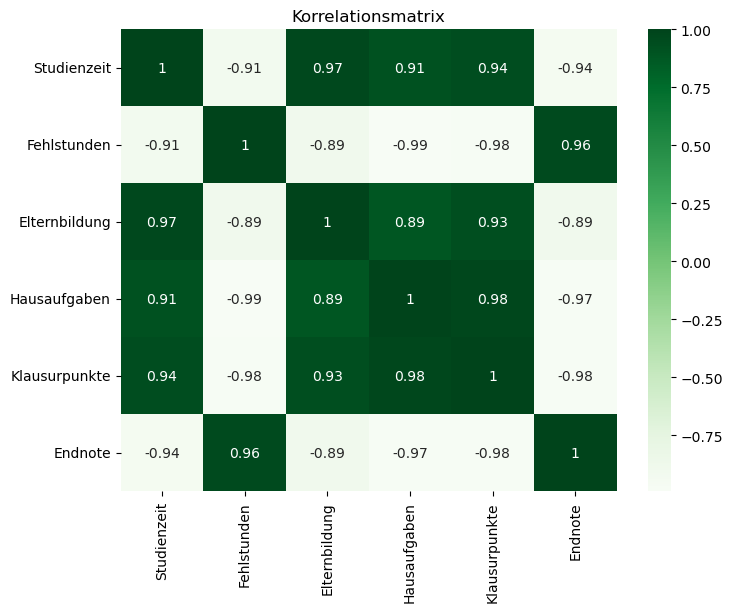

In [10]:
df = pd.read_csv('schueler_noten.csv', sep = ';')
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title("Korrelationsmatrix")
plt.show()

In [14]:
import pandas as pd

data = {
   "lagerung": {
        "kuehlschrank": [
            "Milch", "Butter", "Tomaten", "Eier", "Käse", "Joghurt",
            "Wurst", "Salat", "Paprika", "Gurke"
        ],
        "speisekammer": [
            "Mehl", "Zucker", "Nudeln", "Reis", "Haferflocken",
            "Linsen", "Kichererbsen", "Olivenöl", "Konserven (z. B. Mais, Bohnen)", "Salz"
        ]
    }
}

rows = []
for lagerort, zutaten in data["lagerung"].items():
    for zutat in zutaten:
        rows.append({"lagerort": lagerort, "zutat": zutat})

df_lagerung = pd.DataFrame(rows)

# CSV speichern
file_path = "lagerung.csv"
df_lagerung.to_csv(file_path, sep=";", index=False)

print(f"{file_path} wurde erfolgreich erstellt!")


lagerung.csv wurde erfolgreich erstellt!


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:

rezepte = pd.read_csv('rezepte.csv', sep=';')
lager = pd.read_csv('lagerung.csv', sep=';')

rezepte['zutaten'] = rezepte['zutaten'].str.lower().str.strip()
lager['zutat'] = lager['zutat'].str.lower().str.strip()
verfuegbare_zutaten = set(lager['zutat'].unique())
def zutaten_liste(zutaten_str):
    return [z.strip() for z in zutaten_str.split(',')]

rezepte['zutaten_liste'] = rezepte['zutaten'].apply(zutaten_liste)


def kann_kochen(zutaten_liste, verfuegbare_zutaten):
    fehlend = [z for z in zutaten_liste if z not in verfuegbare_zutaten]
    return len(fehlend) == 0, fehlend

vorschlaege = []
fehlende_info = []

for _, row in rezepte.iterrows():
    gericht = row['name']
    zutaten = row['zutaten_liste']
    kochbar, fehlend = kann_kochen(zutaten, verfuegbare_zutaten)
    
    if kochbar:
        vorschlaege.append(row)
    else:
        fehlende_info.append({
            'Gericht': gericht,
            'Fehlende Anzahl': len(fehlend),
            'Fehlende Zutaten': ', '.join(fehlend)
        })

df_vorschlaege = pd.DataFrame(vorschlaege)

df_vorschlaege = df_vorschlaege.sort_values(by='zubereitungszeit_min')

print("Du kannst folgende Gerichte kochen (sortiert nach Zeit):\n")
for _, row in df_vorschlaege.iterrows():
    print(f"{row['name']}")
    print(f"{row['zubereitungszeit_min']} Min | Vegan: {row['vegan']} | {row['schwierigkeitsgrad']}")
    print()

df_fehlend = pd.DataFrame(fehlende_info)
df_fast_kochbar = df_fehlend[df_fehlend['Fehlende Anzahl'] <= 2]

if not df_fast_kochbar.empty:
    print("Fast kochbar – nur 1–2 Zutaten fehlen:\n")
    for _, row in df_fast_kochbar.iterrows():
        print(f"🔧 {row['Gericht']} – fehlt: {row['Fehlende Zutaten']}")

Du kannst folgende Gerichte kochen (sortiert nach Zeit):

Pfannkuchen
30 Min | Vegan: False | mittel

